### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/berkiu/pytorch-machine-translation

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [1]:
EMB_SIZE = 256
NHEAD = 8
FFN_HID_DIM = 256
BATCH_SIZE = 1024
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3
RANDOM_STATE = 42
MAX_LEN = 15
LEARNING_RATE = 0.001
SHEDULER_STEP_SIZE = 10
DROPOUT = 0.1
EPOCH_NUM = 20
TRAIN_SIZE = 0.8

In [2]:
import os
import re
import json
import matplotlib.pylab as plt

In [6]:
MATCH_REGEX = re.compile(r"[+-]?\b(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)\b")

def extract_values(string):
    result = dict()
    params = ['val_loss', 'train_loss', 'bleu_score']
    if "train_loss" in string:
        found_vals = [re_match[0] for re_match in re.findall(MATCH_REGEX, string)]
    
        if len(params) == len(found_vals):
            for name, val in zip(params, found_vals):
                result[name] = float(val)
    return result

def plot_results(train_losses, val_losses, val_bleues, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    ax1.plot(range(len(train_losses)), train_losses, label='train loss')
    ax1.plot(range(len(val_losses)), val_losses, label='val loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend()
    
    ax2.plot(range(len(val_bleues)), val_bleues, label='val bleu')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('BLEU')
    ax2.legend()
    
    fig.suptitle(title, fontsize=20)
    plt.show()

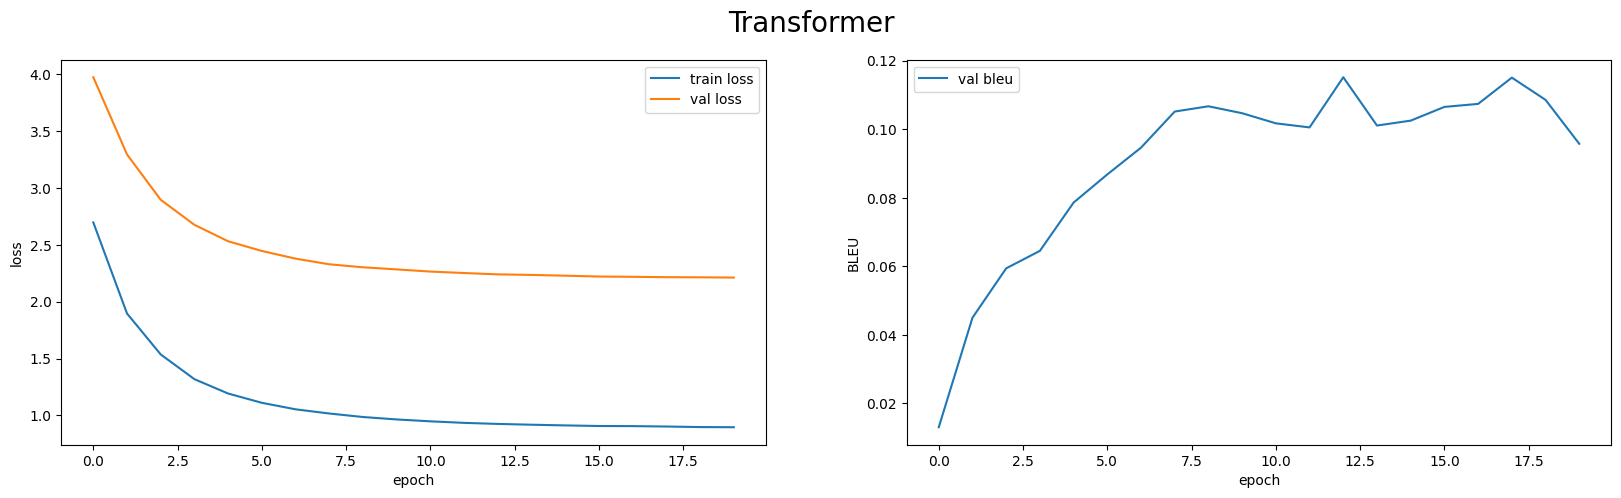

In [8]:
DATAPATH = './Seq2SeqTransformer/training_logs'
progress_file_path = os.path.join(DATAPATH, "progress_log.txt")
file_content = open(progress_file_path, 'r').read().split("\n")

train_loss_list, val_loss_list, val_bleu_list = [], [], []
for line in file_content:
    d = extract_values(line)
    if len(d) > 0:
        train_loss_list.append(d['train_loss'])
        val_loss_list.append(d['val_loss'])
        val_bleu_list.append(d['bleu_score'])

plot_results(train_loss_list, val_loss_list, val_bleu_list, title='Transformer')

do you know why he put off his depart ure ---> ты знаешь почему он от ло жил свой от ъ ез д ---> ты знаешь почему он от кла ды вает свои мо ре кла ды\
the second world war lasted from to ---> вто рая ми ро вая война продолжал ась с по год ---> война продолжал ась продолжал ась с мен ными\
tom i want you to stay with the kids ---> том я хочу чтобы ты остался с детьми ---> я хочу чтобы ты остался с томом\
i figured it was easier to do it this way ---> я по ла гал что лег че это сделать таким образ ом ---> я сделал это как это было проще\
it wasn t as simple as we thought it was going to be ---> это было не так просто как мы думали ---> мы думали что это не так просто\
i as sure you i didn t intend to deceive you ---> у вер я ю вас я не собирался вас обма ны вать ---> я не знал что ты собираешься тебя так обма нуть\
i ve decided to go to boston for the summer ---> я решил поехать на лето в бостон ---> я решил поехать в бостон\
i asked tom how he was doing and he rep lied that he was ---> я спросил тома как у него дела и он ответил что нормально ---> том спросил у него он не знает как он это делает и я ему раз\
head l ines are supposed to gr ab the read er s interest ---> за голо в ки стро я тся с рас чё том на то чтобы ---> голо вы должны читать по по по по и ски х\
it s difficult for me to understand french when it s spoken quickly ---> я с тру дом понимаю по французски если говорят быстро ---> этокажется мне трудно понять когда это делается

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text